In [93]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from typing import List, Tuple
from random import randint


In [94]:
def f(x, y):
    return np.absolute((10*(x**2)-5*(x**2)-4*(y**2)-(x**4)-2*(y**4))/2)+1

In [95]:
k=20
dimIndivid = 2**k -1
n = 50
nrIteratii=200

In [96]:
fileOutput = open('txt.txt','w')
generatie= [list(np.random.choice(2, k)) for cromozom in range(n)]

In [97]:
def functieMapare(v, a, b):
    v = sum(j<<i for i,j in enumerate(reversed(v)))
    return a + v * (b-a)/dimIndivid

In [98]:
def cdf(lista):
    q = [0]
    for p in lista:
        q.append(q[len(q)-1] + p)
    return q

In [99]:
def probabilitateRandom(n):
    return np.random.uniform(0, 1, n)

In [100]:
def generatiaNoua(p, q, generatie):
    newGen = []
    for i in range(0, len(p)):
        for j in range(0, len(q)-1):
            if p[i] > q[j] and p[i] <= q[j+1]:
                newGen.append(generatie[j].copy())
    return newGen

In [101]:
def selectia(generatie):
    Y = []
    for c in generatie:
        x = functieMapare(c, -20, 20)
        y = functieMapare(c, -5, 5)
        print(f'cromozom: x={x}, y={y}', file=fileOutput)
        z = f(x, y)
        Y.append(z)
        print('valoare:', z, file=fileOutput)
    Py=Y/sum(Y)
    q=cdf(Py)
    p=probabilitateRandom(n)
    return generatiaNoua(p,q, generatie)

In [102]:
def combine(c1, c2, t):
    newC1 = c1[:t] + c2[t:]
    newC2 = c2[:t] + c1[t:]
    return newC1, newC2

In [103]:
def incrucisare(generatie, p, t):
    c1 = []
    poz = -1
    c2 = []
    threshold=0.1
    for i in range(0, n):
        if p[i] < threshold:
            if len(c1) == 0:
                c1 = generatie[i]
                poz = i
            else:
                c2 = generatie[i]
                generatie[poz], generatie[i] =combine(c1, c2, t)
                c1 = []
                c2 = []
    return generatie

In [104]:
def mutatie(generatie):
    threshold=0.01
    for cromozom in range(0, len(generatie)):
        for gena in range(0, len(generatie[cromozom])):
            if np.random.uniform(0, 1) < threshold:
                generatie[cromozom][gena] = 1 - generatie[cromozom][gena]
    return generatie

In [105]:
def alg(nrIteratii,n,k,generatie):
    for i in range(0, nrIteratii):
        print('#inceput date generatie', i, file=fileOutput)
        generatie = selectia(generatie)
        p = probabilitateRandom(n)
        t = randint(1, k-1)
        generatie = incrucisare(generatie, p, t)
        generatie = mutatie(generatie)
        print('#sfarsit date generatie ', i, file=fileOutput)

In [106]:
alg(nrIteratii,n,k,generatie)

In [107]:
fileOutput.close()

## functii din plot_GA 

In [108]:
def read_GA_file(input_file_path:str) -> Tuple[List[float],List[float]]:
    """Read the values produced by a genetic algorithm, as found in file given in :param input_file_path:
    :param input_file_path: the input file path, containing output produced by a GA algorithm. 
    :return: a touple two lists. The first list contains the average value of each generation.The second list contains 
    the max value of each generation. Both lists has same length NR."""
    with open(input_file_path, 'rt') as f:
        lines = f.readlines()
    lines = [line for line in lines if len(line.strip()) > 0] # remove empty entries
    lines_start_generation = [i for i, line in enumerate(lines) if line.startswith('#inceput date generatie')]
    lines_end_generation = [i for i, line in enumerate(lines) if line.startswith('#sfarsit date generatie')]
    
    # check for paired start-end notifications
    assert len(lines_start_generation) == len(lines_end_generation) 
    # start block right after end of previous block
    assert np.all(np.array(lines_start_generation[1:]) - 1 == np.array(lines_end_generation[:-1])) 
    
    result_mean_generations = [] # a list of floating point values, with mean of each generation
    result_best_generations = [] # a list of floating point values, with max of each generation
    
    for start_index, end_index in zip(lines_start_generation, lines_end_generation):
        values_current_population = []
        for index_line in range(start_index+2, end_index, 2): # step 2 because we do not use the x and y values of the chromosome
            line = lines[index_line]
            assert line.startswith('valoare: ')
            value_chromosome = float(line.split(': ')[1])
            values_current_population.append(value_chromosome)
        result_mean_generations.append(np.mean(values_current_population))
        result_best_generations.append(np.max(values_current_population))
    
    return result_mean_generations, result_best_generations
    

In [109]:
def plot_GA(result_mean_generations:List[float], result_best_generations:List[float]) -> None:
    """Plots the evolutions of the genetic populations.
    :return: None"""
    generations = range(len(result_mean_generations))
    f, ax = plt.subplots(figsize=(20, 10))
    
    ax.plot(result_mean_generations, label='Generation mean')
    ax.plot(result_best_generations, 'g', label='Generation best')
    ax.set_xticks(generations)
    ax.set_xlabel('Generation number')
    ax.set_ylabel('Fitness value')
    ax.set_title('Population evolution')
    ax.legend(loc='best')

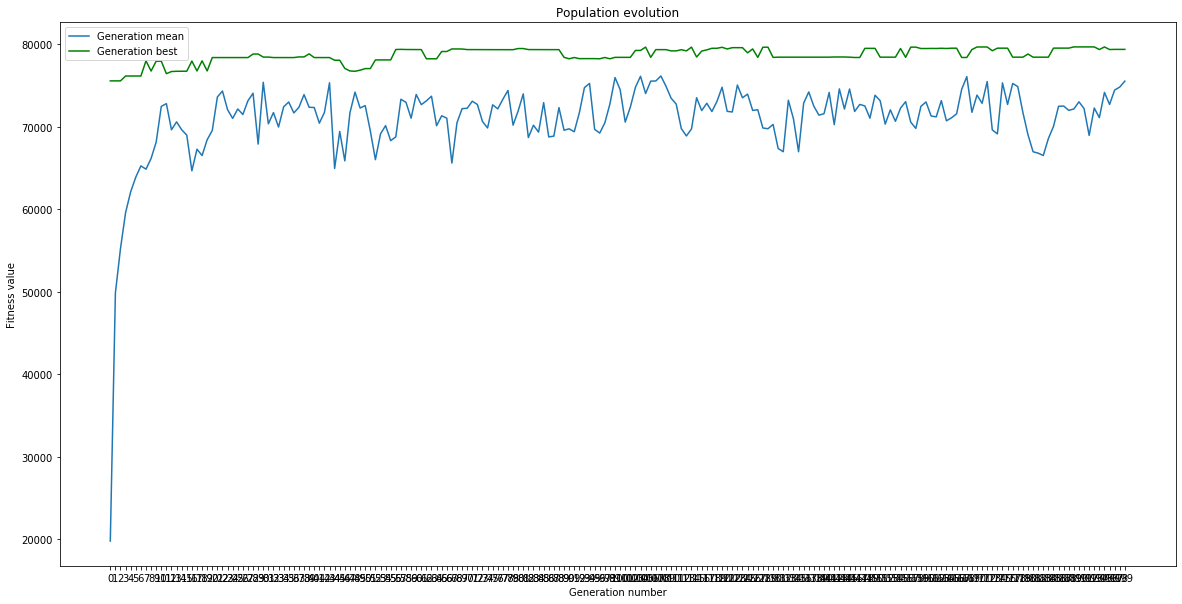

In [110]:
file_name = 'txt.txt'
result_mean_generations, result_best_generations = read_GA_file(file_name)
plot_GA(result_mean_generations, result_best_generations)